In [ ]:
cat_feat=[i for i in test_data.columns if test_data[i].dtypes=='O']

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Import the librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Read the data
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Last rows of the data
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,...,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
#Shape of the data
data.shape

(1460, 81)

In [6]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#check any Missing values present
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

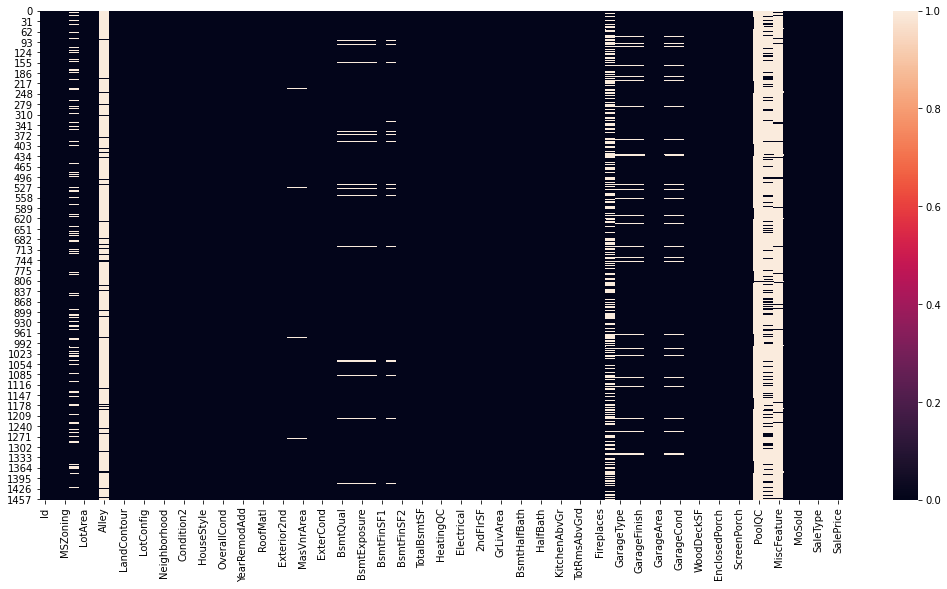

In [9]:
#Visualize null values with heatmap
plt.figure(figsize=(18,9))
sns.heatmap(data.isnull())

In [10]:
#Check datatype 
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [11]:
#Numerical features in the data
feature_with_numerical=[feature for feature in data.columns if data[feature].dtypes !='O']
feature_with_numerical

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [12]:
#Numerical feature with null values
numerical_null=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes !='O']

for feature in numerical_null:
  print("{} :{}Missing values".format(feature,np.around(data[feature].isnull().mean(),4)))

LotFrontage :0.1774Missing values
MasVnrArea :0.0055Missing values
GarageYrBlt :0.0555Missing values


## Categorical imputation

In [13]:
#Categorical_features
categorical_feature=[feature for feature in data.columns if data[feature].dtypes =='O']
print(len(categorical_feature))

43


In [14]:
#Categorical_with_null
categorical_null=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes =='O']

for feature in categorical_null:
  print("{} :{}Missing values".format(feature,np.round(data[feature].isnull().mean(),4)))

Alley :0.9377Missing values
MasVnrType :0.0055Missing values
BsmtQual :0.0253Missing values
BsmtCond :0.0253Missing values
BsmtExposure :0.026Missing values
BsmtFinType1 :0.0253Missing values
BsmtFinType2 :0.026Missing values
FireplaceQu :0.4726Missing values
GarageType :0.0555Missing values
GarageFinish :0.0555Missing values
GarageQual :0.0555Missing values
GarageCond :0.0555Missing values
PoolQC :0.9952Missing values
Fence :0.8075Missing values
MiscFeature :0.963Missing values


In [15]:
cat=data[categorical_null]

In [16]:
cat.head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN


In [17]:
num=data[numerical_null]

In [18]:
for i in cat.columns:
  print(cat[i].value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
G

In [19]:
def impute_cat(data,variable):
  mode=data[variable].mode()[0]

  data[variable].fillna(mode,inplace=True)


In [20]:
cat_null=['BsmtExposure',	'BsmtFinType1',	'BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']

In [21]:
for i in cat_null:
  impute_cat(data,i)


In [22]:
#check the categorical data
categorical_feat=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes =='O']
categorical_feat

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'FireplaceQu',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [23]:
#Drop the values in Alley,PoolQC,Fence,MiscFeature because it has more nan values
data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [24]:
data['BsmtQual'].fillna(data['BsmtQual'].mode()[0],inplace=True)
data['BsmtCond'].fillna(data['BsmtCond'].mode()[0],inplace=True)

In [25]:
data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0],inplace=True)
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0],inplace=True)

## Numerical imputation

In [26]:
#Numerical feature with null values
numerical_null=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes !='O']

for feature in numerical_null:
  print("{} :{}Missing values".format(feature,np.around(data[feature].isnull().mean(),4)))

LotFrontage :0.1774Missing values
MasVnrArea :0.0055Missing values
GarageYrBlt :0.0555Missing values


In [27]:
print(data['LotFrontage'].median())
print(data['MasVnrArea'].mean())
print(data['GarageYrBlt'].median())


69.0
103.68526170798899
1980.0


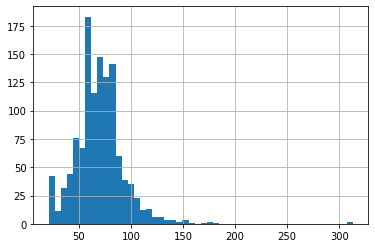

In [28]:
data['LotFrontage'].hist(bins=50)

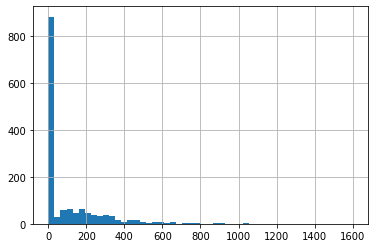

In [29]:
data['MasVnrArea'].hist(bins=50)

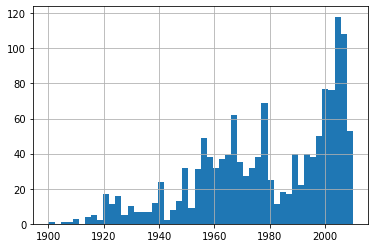

In [30]:
data['GarageYrBlt'].hist(bins=50)

In [31]:
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(),inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(),inplace=True)

In [32]:
data.dropna(inplace=True)
data.reset_index(drop=True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1455,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1456,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1457,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Gd,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


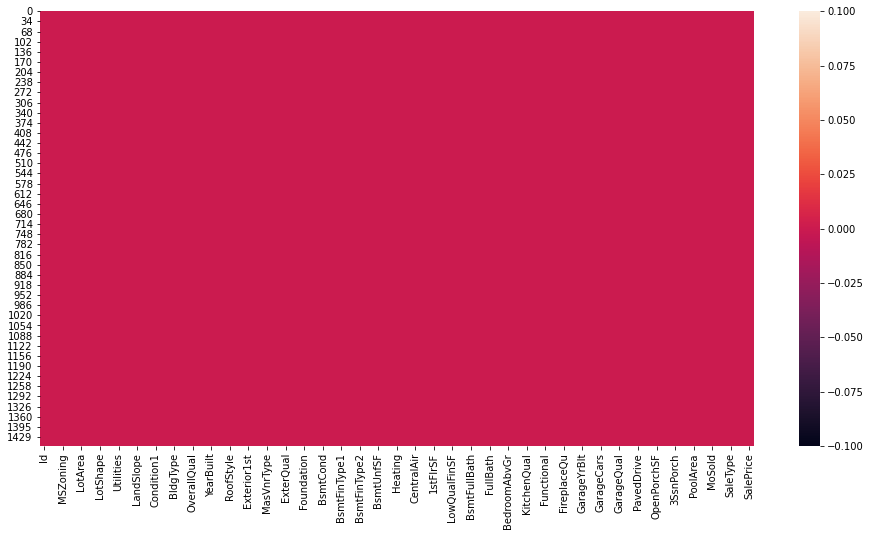

In [33]:
plt.figure(figsize=(16,8))
sns.heatmap(data.isnull())

In [34]:
feature_with_numerical=[feature for feature in data.columns if data[feature].dtypes !='O']
data[feature_with_numerical].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [35]:
#check discrete_features in numerical _data

discreate_data=[feature for feature in feature_with_numerical if len(data[feature].unique())<25 and feature not in ['Id']]
discreate_data

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

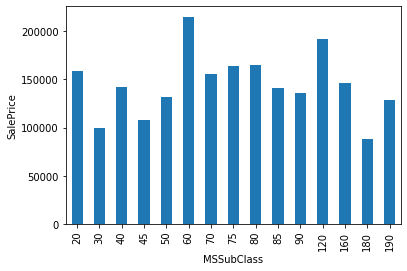

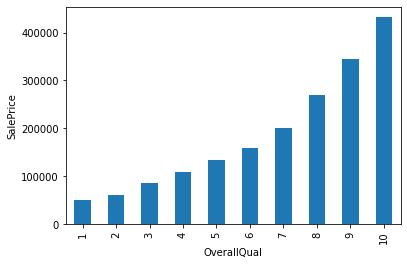

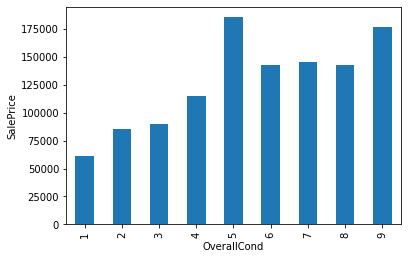

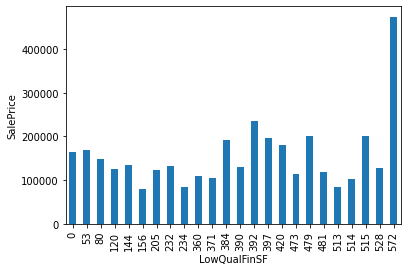

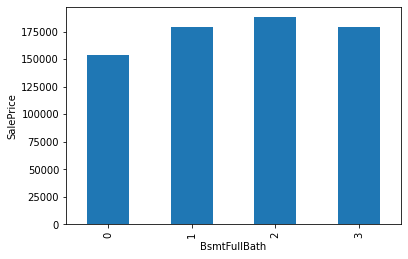

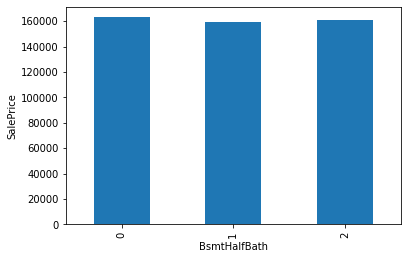

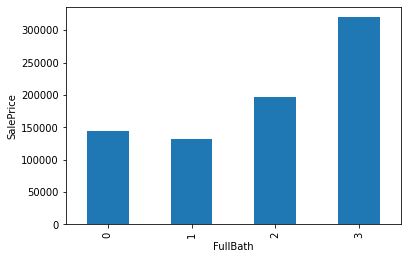

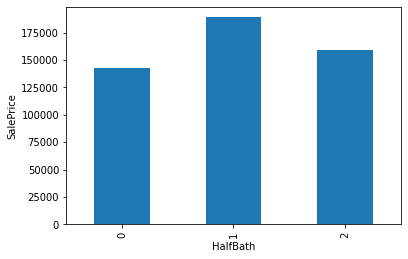

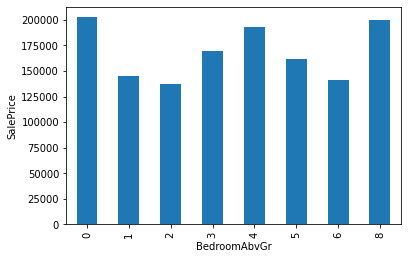

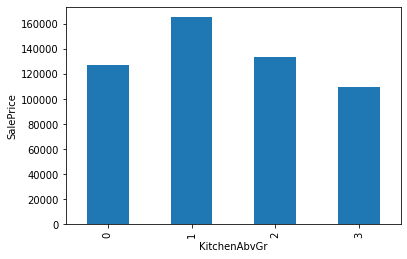

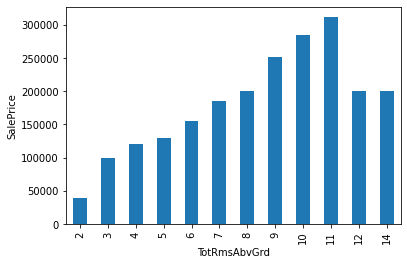

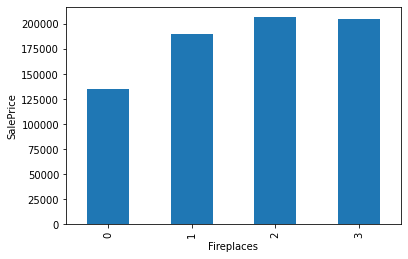

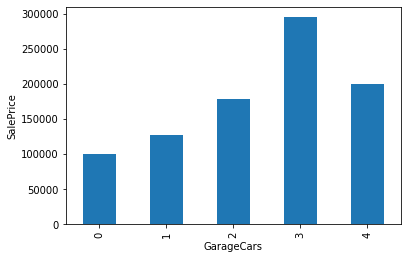

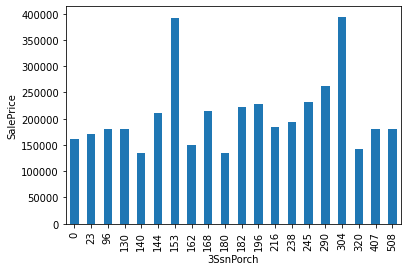

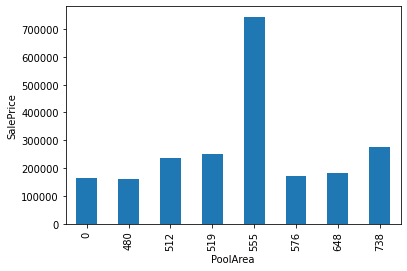

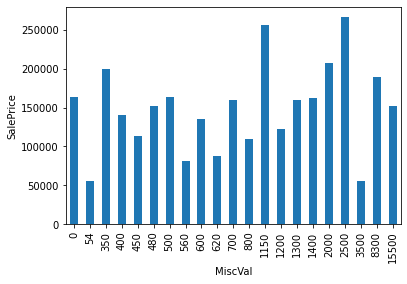

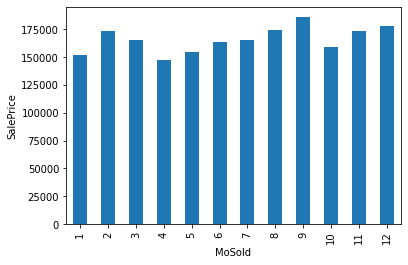

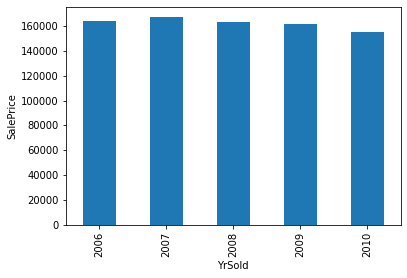

In [36]:
#check any relationship between the target

for feature in discreate_data:
  data=data.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.show()

In [37]:
#Countineous data
countineous_feature=[feature for feature in feature_with_numerical if feature not in discreate_data+['Id']]
countineous_feature

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

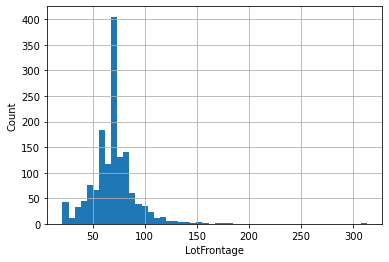

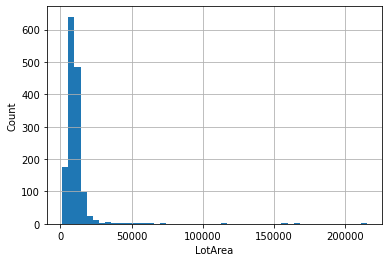

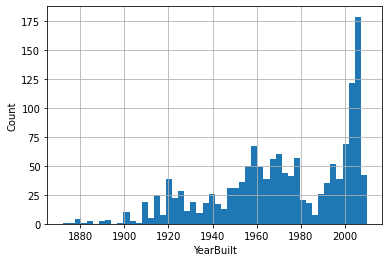

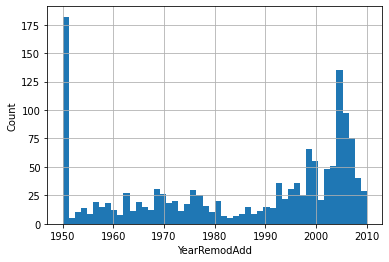

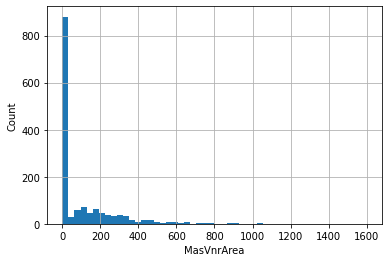

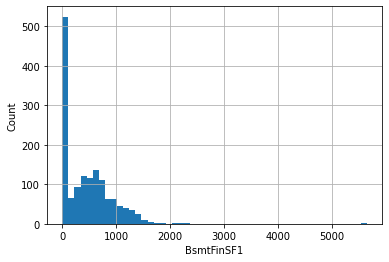

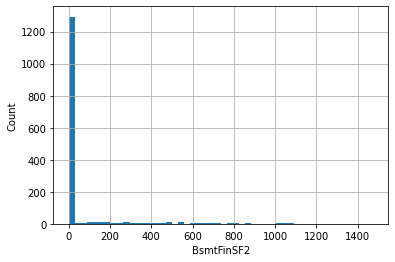

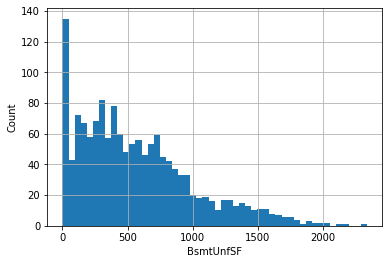

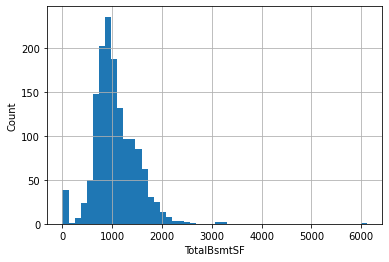

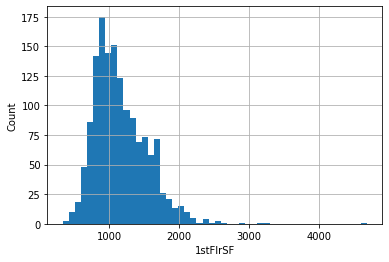

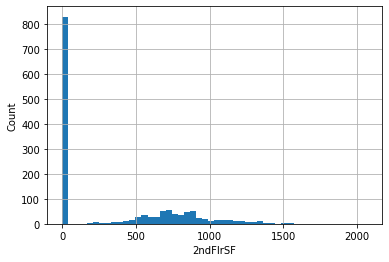

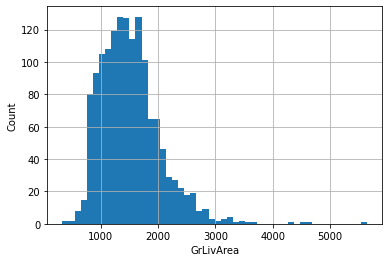

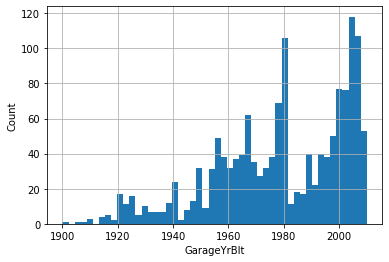

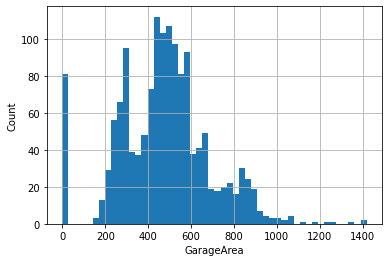

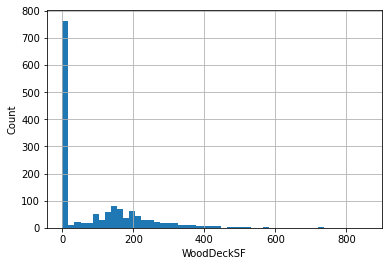

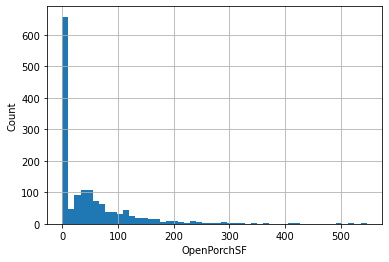

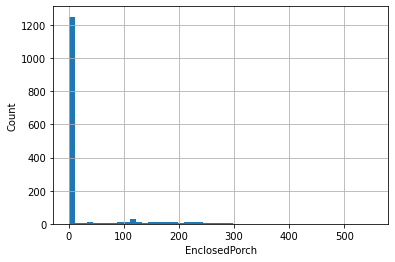

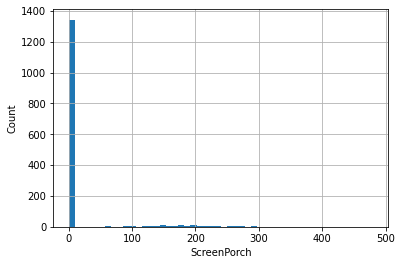

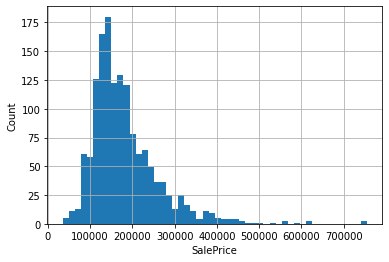

In [38]:
for feature in countineous_feature:
  data=data.copy()

  data[feature].hist(bins=50)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.show()

In [39]:
categorical_feat=[feature for feature in data.columns if data[feature].dtypes =='O']

In [40]:
for i in categorical_feat:
  order=data.groupby(i)['SalePrice'].mean().sort_values().index
  labels_ordered={k:i for i,k in enumerate(order,0)}
  data[i]=data[i].map(labels_ordered)

In [41]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,1,1,0,0,16,4,4,4,6,7,5,2003,2003,1,2,11,12,2,196.0,2,3,5,2,2,0,5,706,4,0,150,856,5,4,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,4,2003.0,1,2,548,2,4,2,0,61,0,0,0,0,0,2,2008,4,4,208500
1,2,20,3,80.0,9600,1,0,1,1,1,0,20,2,4,4,5,6,8,1976,1976,1,2,4,5,1,0.0,1,3,2,2,2,3,3,978,4,0,284,1262,5,4,1,4,1262,0,0,1262,0,1,2,0,3,1,1,6,6,1,3,4,1976.0,1,2,460,2,4,2,298,0,0,0,0,0,0,5,2007,4,4,181500
2,3,60,3,68.0,11250,1,1,1,1,0,0,16,4,4,4,6,7,5,2001,2002,1,2,11,12,2,162.0,2,3,5,2,2,1,5,486,4,0,434,920,5,4,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,3,4,2001.0,1,2,608,2,4,2,0,42,0,0,0,0,0,9,2008,4,4,223500
3,4,70,3,60.0,9550,1,1,1,1,2,0,17,4,4,4,6,7,5,1915,1970,1,2,5,8,1,0.0,1,3,1,1,3,0,3,216,4,0,540,756,5,3,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,1,1998.0,0,3,642,2,4,2,0,35,272,0,0,0,0,2,2006,4,1,140000
4,5,60,3,84.0,14260,1,1,1,1,1,0,24,4,4,4,6,8,5,2000,2000,1,2,11,12,2,350.0,2,3,5,2,2,2,5,655,4,0,490,1145,5,4,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,4,2000.0,1,3,836,2,4,2,192,84,0,0,0,0,0,12,2008,4,4,250000


In [42]:
#Drop the Id column
data.drop('Id',1,inplace=True)

In [43]:
#Correlation
data.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,-0.211700,-0.356810,-0.139766,-0.024995,-0.103480,-0.027817,0.022836,-0.070662,-0.025590,-0.056152,-0.012070,-0.036907,-0.718433,0.002248,0.032936,-0.059134,0.027435,0.040199,-0.136965,-0.038163,-0.009776,-0.023305,0.028887,0.023115,0.016440,-0.013326,0.059713,0.076598,-0.005138,0.055175,0.139728,-0.069501,0.054449,-0.065549,-0.140627,-0.238160,-0.025823,-0.019403,-0.101886,0.027220,-0.251484,0.307713,0.046524,0.074949,0.003799,-0.002243,0.131354,0.177004,-0.023502,0.281833,-0.012662,0.040274,0.030073,-0.045232,0.026924,-0.062082,0.081000,-0.012879,-0.040232,-0.098558,0.024406,-0.011211,-0.060041,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.047957,-0.027619,-0.084230
MSZoning,-0.211700,1.000000,0.256020,0.140885,0.084594,0.187363,0.045687,-0.009407,0.079824,0.006264,0.542919,0.135375,0.077102,0.159105,0.227335,0.269568,-0.146243,0.461864,0.240980,0.069630,0.019922,0.171481,0.195567,0.147263,0.128297,0.274821,0.131680,0.273361,0.285233,0.138133,0.090206,0.062574,0.170361,-0.053285,0.035996,0.047067,0.237889,0.074865,0.199824,0.254321,0.183303,0.240828,-0.008050,-0.105708,0.160641,0.120354,0.025284,0.266646,0.168771,0.105869,-0.111668,0.246886,0.121776,0.059594,0.170811,0.117942,0.312817,0.310687,0.274220,0.253376,0.255773,0.125755,0.156030,0.289638,0.125591,0.092639,-0.224720,0.032811,0.024281,0.024681,0.000808,-0.004582,0.010453,0.172760,0.121051,0.324669
LotFrontage,-0.356810,0.256020,1.000000,0.304533,-0.037356,0.155440,0.048694,0.001024,0.090808,0.065627,0.233765,0.030081,0.036945,0.229008,0.115578,0.234942,-0.053235,0.116627,0.083277,0.181395,0.054824,0.076750,0.090376,0.118971,0.179119,0.165663,0.045840,0.081399,0.164033,0.045135,0.161620,0.025213,0.214533,-0.024655,0.042493,0.124147,0.363919,0.009317,0.090067,0.067326,0.063604,0.414037,0.072334,0.037481,0.368039,0.090444,-0.006956,0.180497,0.047126,0.236828,-0.004884,0.169790,0.320501,0.015909,0.233388,0.103430,0.233362,0.062911,0.211145,0.269520,0.323559,0.048064,0.044898,0.088096,0.075538,0.137107,0.010323,0.061957,0.037683,0.180827,-0.000247,0.010499,0.006367,0.121449,0.064983,0.334793
LotArea,-0.139766,0.140885,0.304533,1.000000,-0.197128,0.305515,0.183710,-0.010122,0.176673,0.436864,0.181994,0.019930,0.037971,0.065530,0.009938,0.105786,-0.005665,0.014296,0.013852,0.109244,0.160009,0.021135,0.032673,0.003636,0.103941,0.055542,0.021126,-0.019284,0.079821,0.028158,0.232298,-0.032130,0.214121,-0.082953,0.111158,-0.002641,0.260962,-0.015131,0.003573,0.049770,0.047446,0.299533,0.051030,0.004773,0.263109,0.158147,0.048034,0.126100,0.014333,0.119700,-0.017796,0.067916,0.190037,-0.024431,0.271398,0.084931,0.119718,-0.025813,0.116499,0.154893,0.180392,0.026857,0.027913,0.015150,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.023551,0.037177,0.263837
Street,-0.024995,0.084594,-0.037356,-0.197128,1.000000,-0.023288,-0.016658,-0.001683,-0.000438,-0.179353,0.038038,-0.035015,-0.003319,0.099356,0.044035,0.058871,0.042875,0.021096,0.065443,-0.020787,0.007231,0.052923,0.051538,0.013181,0.017353,0.100294,0.004452,0.046942,0.021936,0.002480,-0.093396,0.014534,-0.015605,0.04283

In [44]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [45]:
x=data.iloc[:,:-1]
y=data['SalePrice']

In [46]:
#Feaure selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [47]:
select=SelectKBest(score_func=chi2,k=10)
sc=select.fit(x,y)

In [48]:
sc

SelectKBest(k=10, score_func=<function chi2 at 0x7f9652012268>)

In [49]:
df_scores=pd.DataFrame(sc.scores_,columns=['Score'])
df_scores.nlargest(10,'Score')

,Score
3,1.011442e+07
70,6.249006e+06
42,4.649813e+05
32,3.994498e+05
69,3.832987e+05
34,3.685835e+05
24,2.856095e+05
35,2.747139e+05
43,2.447074e+05
44,1.968564e+05


In [50]:
dfcolumns=pd.DataFrame(x.columns)

In [51]:
selected=pd.concat([df_scores,dfcolumns],axis=1)
selected.nlargest(10,'Score')

,Score,0
3,1.011442e+07,LotArea
70,6.249006e+06,MiscVal
42,4.649813e+05,2ndFlrSF
32,3.994498e+05,BsmtFinSF1
69,3.832987e+05,PoolArea
34,3.685835e+05,BsmtFinSF2
24,2.856095e+05,MasVnrArea
35,2.747139e+05,BsmtUnfSF
43,2.447074e+05,LowQualFinSF
44,1.968564e+05,GrLivArea


In [52]:
#Another technique of feature selection
from sklearn.ensemble import ExtraTreesRegressor
ex=ExtraTreesRegressor()
extra=ex.fit(x,y)

In [53]:
extra.feature_importances_

array([3.05916938e-03, 3.57149141e-03, 3.10069135e-03, 6.87278782e-03,
       5.06730704e-05, 3.35475293e-03, 3.34374698e-03, 1.29882474e-05,
       2.28509837e-03, 1.93332906e-03, 9.73213450e-02, 1.50907869e-03,
       8.12163069e-04, 1.52028316e-03, 1.52330141e-03, 2.49565634e-01,
       3.88453409e-03, 9.47106012e-03, 6.86719738e-03, 2.78596028e-03,
       1.10874967e-03, 2.51179334e-03, 1.97687156e-03, 2.39733489e-03,
       4.15192442e-03, 8.64893863e-02, 1.55389564e-03, 1.56678141e-03,
       4.78085593e-02, 8.99352312e-04, 5.15265481e-03, 2.13107724e-03,
       1.48716069e-02, 6.25955112e-04, 1.10785953e-03, 2.65536899e-03,
       1.69656459e-02, 3.85362519e-04, 1.45646068e-03, 6.10152122e-03,
       4.59347286e-04, 1.99327466e-02, 1.67489062e-02, 6.51343829e-04,
       6.94234250e-02, 5.17206939e-03, 1.76810731e-03, 3.27326779e-02,
       3.88059088e-03, 5.76705979e-03, 6.80062452e-04, 5.88858845e-02,
       9.33597761e-03, 9.44615136e-04, 1.37286261e-02, 3.11632390e-03,
      

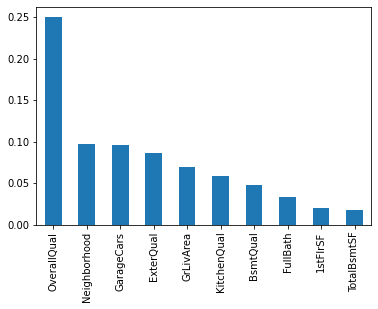

In [54]:
extra_tree=pd.Series(extra.feature_importances_,index=x.columns)
extra_tree.nlargest(10).plot.bar()

In [55]:
#Splitting the data in to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [57]:
#Model Development
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
pred=reg.predict(x_test)
pred[:9]

array([ 54776.30520042, 117552.60959563, 116955.44577493, 165240.10953429,
        70953.37889648,  57274.63487901, 255959.97866952, 247333.97828628,
       300928.24288215])

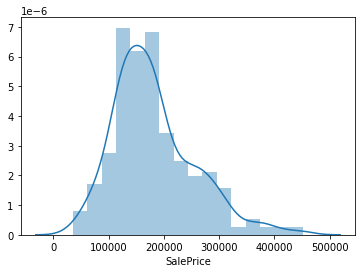

In [58]:
sns.distplot(y_test)

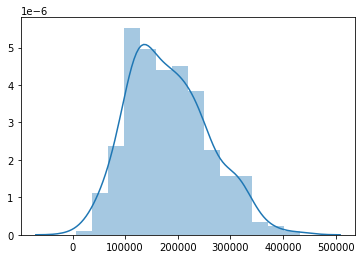

In [59]:
sns.distplot(pred)

In [60]:
from sklearn import metrics
print(metrics.r2_score(y_test,pred))

0.8687740808189898


In [61]:
print(metrics.mean_absolute_error(y_test,pred))

19911.730383167458


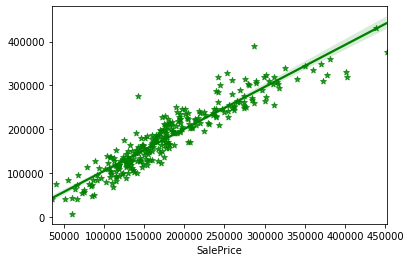

In [62]:
sns.regplot(y_test,pred,color='green',marker='*')

In [63]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)
dt_pred=dt_reg.predict(x_test)
dt_pred[:8]

array([110000., 150750.,  80000., 140000.,  83000.,  81000., 195000.,
       226000.])

In [64]:
print(metrics.r2_score(y_test,dt_pred))
print(metrics.mean_absolute_error(y_test,dt_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))

0.7328378313578701
26026.030821917808
37988.1626900416


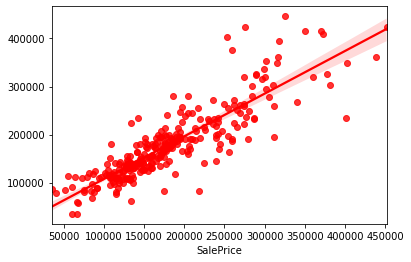

In [65]:
sns.regplot(y_test,dt_pred,color='red')
plt.show()

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)

In [82]:
print(metrics.r2_score(y_test,rf_pred))

0.8927833816407241


In [84]:
print(metrics.mean_squared_error(y_test,rf_pred))

579140215.9910161


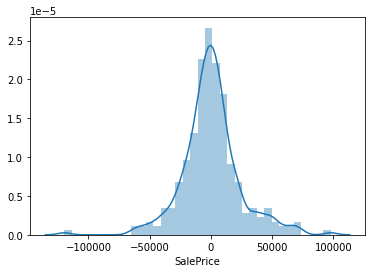

In [85]:
sns.distplot(y_test-rf_pred)

In [320]:
test_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')

In [321]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [322]:
def impute_cat(test_data,variable):
  mode=test_data[variable].mode()[0]

  test_data[variable].fillna(mode,inplace=True)

In [323]:
test_data.shape

(1459, 80)

In [324]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [325]:
cat_null=['BsmtExposure',	'BsmtFinType1',	'BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']

In [326]:
for i in cat_null:
  impute_cat(test_data,i)

In [327]:
test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0],inplace=True)
test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0],inplace=True)
test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode()[0],inplace=True)
test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0],inplace=True)
test_data['LotFrontage'].fillna(test_data['LotFrontage'].median(),inplace=True)
test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean(),inplace=True)
test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].median(),inplace=True)


In [328]:
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64

In [329]:
test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0],inplace=True)
test_data['SaleType'].fillna(test_data['SaleType'].mode()[0],inplace=True)
test_data['Utilities'].fillna(test_data['Utilities'].mode()[0],inplace=True)
test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].median(),inplace=True)
test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].median(),inplace=True)
test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].median(),inplace=True)
test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].median(),inplace=True)
test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].median(),inplace=True)
test_data['GarageCars'].fillna(test_data['GarageCars'].median(),inplace=True)
test_data['GarageArea'].fillna(test_data['GarageArea'].median(),inplace=True)

In [330]:
test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].median(),inplace=True)


In [331]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Gd,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [332]:
test_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Gd,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [333]:
categorical_feat1=[feature for feature in test_data.columns if test_data[feature].dtypes =='O']
cat_data=test_data[categorical_feat1]

In [334]:
cat_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [335]:
for i in cat_data.columns:
  labels_ordered={k:i for i,k in enumerate(cat_data[i],0)}
  test_data[i]=test_data[i].map(labels_ordered)

In [336]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,1414,80.0,11622,1458,1458,1458,1458,1458,1457,1311,1431,1458,1458,1456,5,6,1961,1961,1458,1458,1456,1456,1457,0.0,1458,1458,1456,1456,1458,1456,1455,468.0,1383,144.0,270.0,882.0,1458,1457,1458,1458,896,0,0,896,0.0,0.0,1,0,2,1,1458,5,1458,0,1457,1458,1961.0,1457,1.0,730.0,1458,1458,1458,140,0,0,0,120,0,0,6,2010,1458,1458
1,1462,20,1458,81.0,14267,1458,1448,1458,1458,1448,1457,1311,1458,1458,1458,1456,6,6,1958,1958,1443,1458,1431,1431,1458,108.0,1458,1458,1456,1456,1458,1456,1456,923.0,1458,0.0,406.0,1329.0,1458,1457,1458,1458,1329,0,0,1329,0.0,0.0,1,1,3,1,1442,6,1458,0,1457,1458,1958.0,1457,1.0,312.0,1458,1458,1458,393,36,0,0,0,0,12500,6,2010,1458,1458
2,1463,60,1458,74.0,13830,1458,1448,1458,1458,1458,1457,1217,1458,1458,1458,1458,5,5,1997,1998,1458,1458,1456,1456,1457,0.0,1458,1458,1458,1458,1458,1456,1457,791.0,1458,0.0,137.0,928.0,1458,1454,1458,1458,928,701,0,1629,0.0,0.0,2,1,3,1,1458,6,1458,1,1458,1458,1997.0,1458,2.0,482.0,1458,1458,1458,212,34,0,0,0,0,0,3,2010,1458,1458
3,1464,60,1458,78.0,9978,1458,1448,1458,1458,1458,1457,1217,1458,1458,1458,1458,6,6,1998,1998,1458,1458,1456,1456,1458,20.0,1458,1458,1458,1456,1458,1456,1457,602.0,1458,0.0,324.0,926.0,1458,1458,1458,1458,926,678,0,1604,0.0,0.0,2,1,3,1,1442,7,1458,1,1457,1458,1998.0,1458,2.0,470.0,1458,1458,1458,360,36,0,0,0,0,0,6,2010,1458,1458
4,1465,120,1458,43.0,5005,1458,1448,1435,1458,1458,1457,1173,1458,1458,1455,1456,8,5,1992,1992,1458,1458,1458,1458,1457,0.0,1442,1458,1458,1458,1458,1456,1456,263.0,1458,0.0,1017.0,1280.0,1458,1458,1458,1458,1280,0,0,1280,0.0,0.0,2,0,2,1,1442,5,1458,0,1457,1458,1992.0,1451,2.0,506.0,1458,1458,1458,0,82,0,0,144,0,0,1,2010,1458,1458


In [337]:
test_data=test_data.drop('Id',1)

In [338]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test_data=sc.fit_transform(test_data)

In [342]:
data=pd.DataFrame(test_data)

In [343]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,-0.874711,-0.742817,0.567330,0.363929,0.06426,0.411298,0.334049,0.0,0.395802,0.042356,-0.224182,-0.396142,0.078263,0.313018,0.302911,-0.751101,0.400766,-0.340945,-1.072885,0.143434,0.063965,0.322173,0.264566,0.150272,-0.570108,0.788258,0.126993,0.248702,0.218973,0.142041,0.389145,-0.034740,0.063428,-2.751736,0.517537,-0.650461,-0.370716,0.084625,0.064073,0.272716,0.207688,-0.654561,-0.775254,-0.080483,-1.215588,-0.818068,-0.25816,-1.028720,-0.751040,-1.029543,-0.20391,0.238503,-0.918335,0.105733,-0.898055,0.235123,0.326168,-0.653107,0.475696,-0.988189,1.185921,0.086996,0.087474,0.306438,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905,0.147262,0.250882
1,-0.874711,0.255192,0.615963,0.897861,0.06426,-0.343334,0.334049,0.0,-0.158503,0.042356,-0.224182,0.258549,0.078263,0.313018,0.302911,-0.054877,0.400766,-0.439695,-1.214908,-0.190436,0.063965,-0.417598,-0.213396,0.225331,0.041273,0.788258,0.126993,0.248702,0.218973,0.142041,0.389145,0.364360,1.063511,0.333015,-0.297689,-0.339225,0.639230,0.084625,0.064073,0.272716,0.207688,0.433298,-0.775254,-0.080483,-0.323539,-0.818068,-0.25816,-1.028720,1.237648,0.175997,-0.20391,-0.201277,-0.255371,0.105733,-0.898055,0.235123,0.326168,-0.769806,0.475696,-0.988189,-0.741235,0.086996,0.087474,0.306438,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905,0.147262,0.250882
2,0.061351,0.255192,0.275532,0.809646,0.06426,-0.343334,0.334049,0.0,0.395802,0.042356,-1.365998,0.258549,0.078263,0.313018,0.480292,-0.751101,-0.497418,0.844059,0.678742,0.143434,0.063965,0.322173,0.264566,0.150272,-0.570108,0.788258,0.126993,0.410403,0.545808,0.142041,0.389145,0.763459,0.773377,0.333015,-0.297689,-0.954831,-0.266784,0.084625,-0.566143,0.272716,0.207688,-0.574165,0.891944,-0.080483,0.294508,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,0.238503,-0.255371,0.105733,0.647066,0.286270,0.326168,0.747276,0.828537,0.301406,0.042537,0.086996,0.087474,0.306438,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905,0.147262,0.250882
3,0.061351,0.255192,0.470064,0.032064,0.06426,-0.343334,0.334049,0.0,0.395802,0.042356,-1.365998,0.258549,0.078263,0.313018,0.480292,-0.054877,0.400766,0.876976,0.678742,0.143434,0.063965,0.322173,0.264566,0.225331,-0.456889,0.788258,0.126993,0.410403,0.218973,0.142041,0.389145,0.763459,0.357958,0.333015,-0.297689,-0.526882,-0.271303,0.084625,0.274144,0.272716,0.207688,-0.579190,0.837243,-0.080483,0.243004,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,-0.201277,0.407593,0.105733,0.647066,0.235123,0.326168,0.786176,0.828537,0.301406,-0.012788,0.086996,0.087474,0.306438,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905,0.147262,0.250882
4,1.465443,0.255192,-1.232092,-0.971808,0.06426,-0.343334,-2.970695,0.0,0.395802,0.042356,-1.900465,0.258549,0.078263,-0.397973,0.302911,1.337571,-0.497418,0.679475,0.394694,0.143434,0.063965,0.381355,0.302803,0.150272,-0.570108,-1.206009,0.126993,0.410403,0.545808,0.142041,0.389145,0.364360,-0.387160,0.333015,-0.297689,1.059048,0.528520,0.084625,0.274144,0.272716,0.207688,0.310192,-0.775254,-0.080483,-0.424487,-0.818068,-0.25816,0.773083,-0.751040,-1.029543,-0.20391,-0.201277,-0.918335,0.105733,-0.898055,0.235123,0.326168,0.552779,-1.641355,0.301406,0.153187,0.086996,0.087474,0.306438,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905,0.147262,0.250882


In [344]:
data['SalePrice']=rf_model.predict(test_data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,SalePrice
0,-0.874711,-0.742817,0.567330,0.363929,0.06426,0.411298,0.334049,0.0,0.395802,0.042356,-0.224182,-0.396142,0.078263,0.313018,0.302911,-0.751101,0.400766,-0.340945,-1.072885,0.143434,0.063965,0.322173,0.264566,0.150272,-0.570108,0.788258,0.126993,0.248702,0.218973,0.142041,0.389145,-0.034740,0.063428,-2.751736,0.517537,-0.650461,-0.370716,0.084625,0.064073,0.272716,0.207688,-0.654561,-0.775254,-0.080483,-1.215588,-0.818068,-0.25816,-1.028720,-0.751040,-1.029543,-0.20391,0.238503,-0.918335,0.105733,-0.898055,0.235123,0.326168,-0.653107,0.475696,-0.988189,1.185921,0.086996,0.087474,0.306438,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905,0.147262,0.250882,132398.00
1,-0.874711,0.255192,0.615963,0.897861,0.06426,-0.343334,0.334049,0.0,-0.158503,0.042356,-0.224182,0.258549,0.078263,0.313018,0.302911,-0.054877,0.400766,-0.439695,-1.214908,-0.190436,0.063965,-0.417598,-0.213396,0.225331,0.041273,0.788258,0.126993,0.248702,0.218973,0.142041,0.389145,0.364360,1.063511,0.333015,-0.297689,-0.339225,0.639230,0.084625,0.064073,0.272716,0.207688,0.433298,-0.775254,-0.080483,-0.323539,-0.818068,-0.25816,-1.028720,1.237648,0.175997,-0.20391,-0.201277,-0.255371,0.105733,-0.898055,0.235123,0.326168,-0.769806,0.475696,-0.988189,-0.741235,0.086996,0.087474,0.306438,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905,0.147262,0.250882,158979.50
2,0.061351,0.255192,0.275532,0.809646,0.06426,-0.343334,0.334049,0.0,0.395802,0.042356,-1.365998,0.258549,0.078263,0.313018,0.480292,-0.751101,-0.497418,0.844059,0.678742,0.143434,0.063965,0.322173,0.264566,0.150272,-0.570108,0.788258,0.126993,0.410403,0.545808,0.142041,0.389145,0.763459,0.773377,0.333015,-0.297689,-0.954831,-0.266784,0.084625,-0.566143,0.272716,0.207688,-0.574165,0.891944,-0.080483,0.294508,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,0.238503,-0.255371,0.105733,0.647066,0.286270,0.326168,0.747276,0.828537,0.301406,0.042537,0.086996,0.087474,0.306438,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905,0.147262,0.250882,174230.33
3,0.061351,0.255192,0.470064,0.032064,0.06426,-0.343334,0.334049,0.0,0.395802,0.042356,-1.365998,0.258549,0.078263,0.313018,0.480292,-0.054877,0.400766,0.876976,0.678742,0.143434,0.063965,0.322173,0.264566,0.225331,-0.456889,0.788258,0.126993,0.410403,0.218973,0.142041,0.389145,0.763459,0.357958,0.333015,-0.297689,-0.526882,-0.271303,0.084625,0.274144,0.272716,0.207688,-0.579190,0.837243,-0.080483,0.243004,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,-0.201277,0.407593,0.105733,0.647066,0.235123,0.326168,0.786176,0.828537,0.301406,-0.012788,0.086996,0.087474,0.306438,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905,0.147262,0.250882,165996.70
4,1.465443,0.255192,-1.232092,-0.971808,0.06426,-0.343334,-2.970695,0.0,0.395802,0.042356,-1.900465,0.258549,0.078263,-0.397973,0.302911,1.337571,-0.497418,0.679475,0.394694,0.143434,0.063965,0.381355,0.302803,0.150272,-0.570108,-1.206009,0.126993,0.410403,0.545808,0.142041,0.389145,0.364360,-0.387160,0.333015,-0.297689,1.059048,0.528520,0.084625,0.274144,0.272716,0.207688,0.310192,-0.775254,-0.080483,-0.424487,-0.818068,-0.25816,0.773083,-0.751040,-1.029543,-0.20391,-0.201277,-0.918335,0.105733,-0.898055,0.235123,0.326168,0.552779,-1.641355,0.301406,0.153187,0.086996,0.087474,0.306438,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905,0.147262,0.250882,195488.32


In [345]:
sale=data['SalePrice']

In [346]:
submission_file=pd.read_csv('/content/drive/My Drive/Colab Notebooks/sample_submission.csv')
submission_file

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [347]:
sub_id=submission_file['Id']

In [348]:
final_data=pd.concat([sub_id,sale],axis=1)
final_data

,Id,SalePrice
0,1461,132398.00
1,1462,158979.50
2,1463,174230.33
3,1464,165996.70
4,1465,195488.32
...,...,...
1454,2915,124505.83
1455,2916,127386.23
1456,2917,176002.69
1457,2918,131894.00


In [349]:
final_data.to_csv('SalePrice.csv',index=False)